In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

* **Needed Libraries**

> Sequential provides us to add our layers with order.

> In my model, I plan to use 
    1. Convolutional layers(CNN), 
    2. Maxpooling layers, 
    3. Activation layers, 
    4. Droupout Layers, 
    5. Fully Connected Layers.
  
> I need to make preprocessing to my data; therefore, I need to import ralated libraries, namely 
    1. ImageDataGenerator
    2. img_to_array => convert image to array
    3. load_img => to load image
    
> To plot and visualize the data and results, matplotlib.pyplot will be used. 

> To learn how many class I have, glob library will be used

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense,BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image  import ImageDataGenerator, img_to_array,load_img
import matplotlib.pyplot as plt
from glob import glob

# Loading Data

In [17]:
def load_and_preprocess(data_path):
    data = pd.read_csv(data_path)
    data = data.to_numpy()
    np.random.shuffle(data)
    x = data[:,1:].reshape(-1,28,28,1)/255.0
    y = data[:,0].astype(np.int32)
    y = to_categorical(y, num_classes=len(set(y)))

    return x,y

**Load Train Data & Preprocessing**

In [18]:
x_train,y_train = load_and_preprocess("mnist_train.csv")
print("Shape of x_train : " , x_train.shape)
print("Shape of y_train : " , y_train.shape)

Shape of x_train :  (60000, 28, 28, 1)
Shape of y_train :  (60000, 10)


**Load Test Data & Preprocessing**

In [19]:
x_test,y_test = load_and_preprocess("mnist_test.csv")
print("Shape of x_test : " , x_test.shape)
print("Shape of y_test : " , y_test.shape)

Shape of x_test :  (10000, 28, 28, 1)
Shape of y_test :  (10000, 10)


> Now, we load and preprocess our data. 

**Visualization of Data**

> Lets look at one example image

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


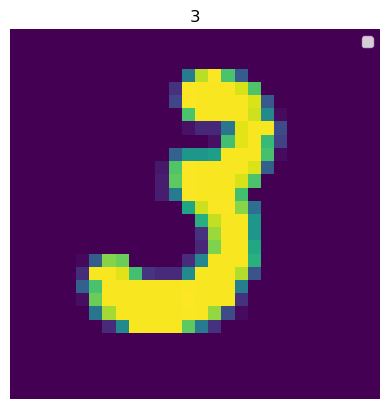

In [20]:
i = 20;
temp = x_train.reshape(60000,28,28)
plt.imshow(temp[i,:,:])
plt.legend()
plt.axis('off')
plt.title(np.argmax(y_train[i]))
plt.show()

# Implementing The Model

> Our class number is 10 since there are 10 number(0,1,2,3,4,5,6,7,8,9)

In [35]:
!python -m pip install --upgrade pip

     ---------------------------------------- 2.1/2.1 MB 1.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1


In [21]:
number_of_class = y_train.shape[1]

**Initializing Model**

In [22]:
model = Sequential()

**Our model sturucture :**
1. 3 Convolutional Layers with Different Filters
2. 3 Batch Normalization Layers
3. Activation function in Convolutional Layers is Relu
4. 3 MaxPooling Layers

In [23]:
model.add(Conv2D(input_shape = (28,28,1), filters = 16, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

In [24]:
model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

In [25]:
model.add(Conv2D(filters = 128, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

**Flatten process and Fully Conncected Neural Network**

In [26]:
model.add(Flatten())
model.add(Dense(units = 256))
model.add(Activation("relu"))

> To learn different proporties of image, we use Dropout

**Dropout and Output Layers**

In [27]:
model.add(Dropout(0.2))
model.add(Dense(units = number_of_class))
model.add(Activation("softmax"))

**Compiling Our Model**

In [28]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [29]:
hist = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs= 5, batch_size= 32)

Epoch 1/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1329 - accuracy: 0.9598 - val_loss: 0.1143 - val_accuracy: 0.9655
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0593 - accuracy: 0.9811 - val_loss: 0.0625 - val_accuracy: 0.9808
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0447 - accuracy: 0.9862 - val_loss: 0.0643 - val_accuracy: 0.9804
Epoch 4/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0366 - accuracy: 0.9886 - val_loss: 0.0500 - val_accuracy: 0.9847
Epoch 5/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0315 - accuracy: 0.9902 - val_loss: 0.0439 - val_accuracy: 0.9876


# Train Proccessing

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 16)       64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 26, 26, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        9280      
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 64)       2

**Save Model**

In [30]:
model.save_weights('cnn_mnist_model.h5')

# Evaluation of Model & Results

In [ ]:
# Create NN with MLP.


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


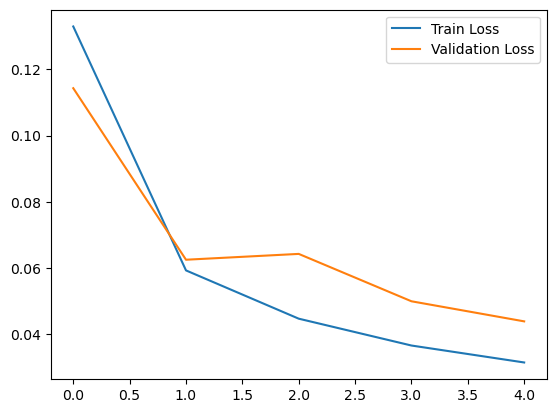

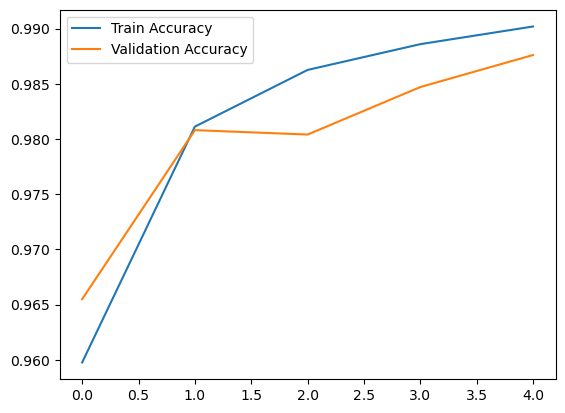

In [31]:
print(hist.history.keys())
plt.plot(hist.history["loss"],label = "Train Loss")
plt.plot(hist.history["val_loss"],label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy")
plt.legend()
plt.show()

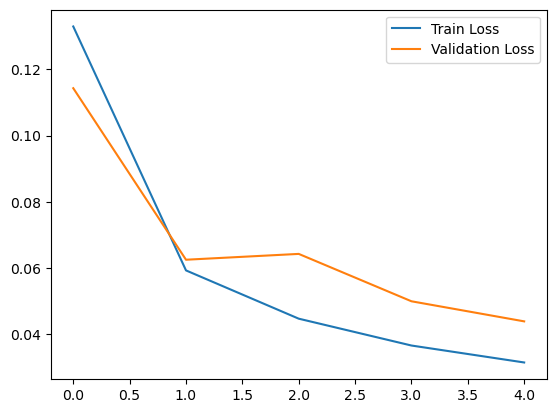

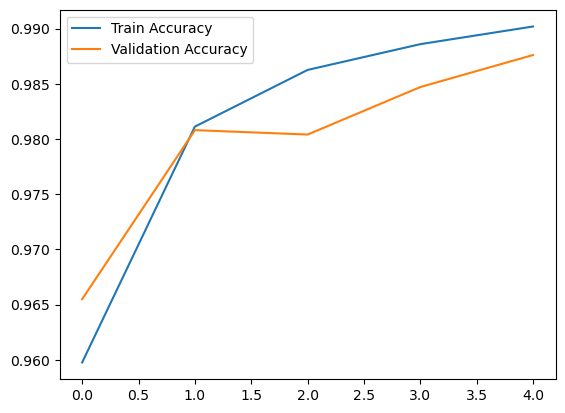

In [32]:
#%% save history
import json
with open('cnn_mnist_hist.json', 'w') as f:
    json.dump(hist.history, f)
    
#%% load history
import codecs
with codecs.open("cnn_mnist_hist.json", 'r', encoding='utf-8') as f:
    h = json.loads(f.read())

plt.figure()
plt.plot(h["loss"],label = "Train Loss")
plt.plot(h["val_loss"],label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(h["accuracy"],label = "Train Accuracy")
plt.plot(h["val_accuracy"],label = "Validation Accuracy")
plt.legend()
plt.show()